## 補足　3クラス潜在変数モデル

In [1]:
# PDF印刷用
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

try:
    from google.colab import files
except:
    pass

pdf_ind = 2
pdf_base = 'pdf-01-'

def create_pdf():
    global pdf_ind, pdf_base
    fn = f'{pdf_base}{pdf_ind:02d}.pdf'
    print(fn)
    plt.rcParams['figure.subplot.bottom'] = 0.15
    plt.rcParams['figure.subplot.left'] = 0.15
    plt.savefig(fn)
    try:
        files.download(fn)
    except:
        pass
    pdf_ind = pdf_ind + 1


<ipython-input-1-58f60e693f09>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


### 共通処理

In [2]:
%matplotlib inline
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [3]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np

# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt

# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib

# pandas用ライブラリ
import pandas as pd

# データフレーム表示用関数
from IPython.display import display

# seaborn
import seaborn as sns

# 表示オプション調整

# NumPy表示形式の設定
np.set_printoptions(
    suppress=True, precision=2, floatmode='fixed'
)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)

# 方眼表示ON
plt.rcParams['axes.grid'] = True

# データフレームでの表示精度
pd.options.display.float_format = '{:.2f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

In [4]:
import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArViz v{az.__version__}")

Running on PyMC v5.7.2
Running on ArViz v0.15.1


### A.1 カテゴリカル分布

#### 確率モデル定義

In [5]:
# パラメータ設定
p = [0.2, 0.5, 0.3]

model = pm.Model()
with model:
    # pm.Categorical: カテゴリカル分布
    # p: 各要素の発生確率
    x = pm.Categorical('x', p=p)

#### 事前分布のサンプリングとサンプル値抽出

In [6]:
with model:
    # 事前分布のサンプリング
    prior_samples = pm.sample_prior_predictive(random_seed=42)

x_samples = prior_samples['prior']['x'].values
print(x_samples)

[[2 2 2 1 2 0 2 2 0 1 1 0 1 2 1 0 2 0 2 1 0 1 2 2 0 1 0 1 2 2 1 1 0 1 2 1
  0 2 1 0 1 2 1 0 2 2 1 0 0 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 2 1 1 0 0 1 0 1
  0 0 1 1 1 2 1 2 0 0 2 1 0 1 1 1 1 1 1 1 0 1 1 0 1 2 1 1 1 2 1 2 2 2 0 2
  2 2 0 2 1 1 0 2 1 1 1 2 1 1 2 2 2 0 2 1 2 1 2 2 1 2 2 1 1 1 2 1 1 1 2 1
  1 2 0 2 1 2 1 0 2 2 1 2 1 2 2 1 0 2 1 1 1 1 0 0 1 0 1 2 0 1 1 0 1 2 2 1
  1 0 1 1 1 2 1 1 1 1 1 1 0 1 0 0 1 1 2 0 2 2 1 1 1 1 1 0 1 1 1 2 2 1 1 2
  1 1 2 1 0 1 1 2 2 2 2 1 2 1 1 1 1 0 2 1 0 1 1 2 2 1 2 0 2 1 1 1 1 2 1 2
  1 0 1 2 1 1 1 0 2 1 2 1 1 2 1 1 1 2 1 0 1 1 2 1 1 1 0 0 0 1 0 2 2 2 0 1
  1 1 0 2 1 0 0 1 2 2 1 1 0 1 2 2 1 1 1 1 0 2 1 2 2 2 1 1 1 0 1 1 1 1 2 0
  1 1 1 0 2 1 0 1 2 0 1 1 1 0 0 1 0 1 1 1 1 2 1 1 0 1 2 2 1 1 0 1 2 2 2 1
  2 1 2 1 0 2 1 0 1 1 2 1 0 0 1 0 2 2 1 2 1 1 0 0 0 2 2 1 1 0 1 1 2 1 1 1
  1 0 1 2 1 2 1 1 0 1 1 1 2 0 0 2 1 1 2 2 1 2 0 2 2 1 1 2 1 2 2 1 1 1 2 1
  2 0 0 1 1 1 2 1 1 1 1 1 1 0 2 1 0 1 2 0 1 1 1 2 1 2 1 0 2 0 2 2 1 1 0 2
  0 1 1 0 0 2 1 1 1 2 2 2 1 0 1 2 1 1 

#### サンプリング結果の可視化

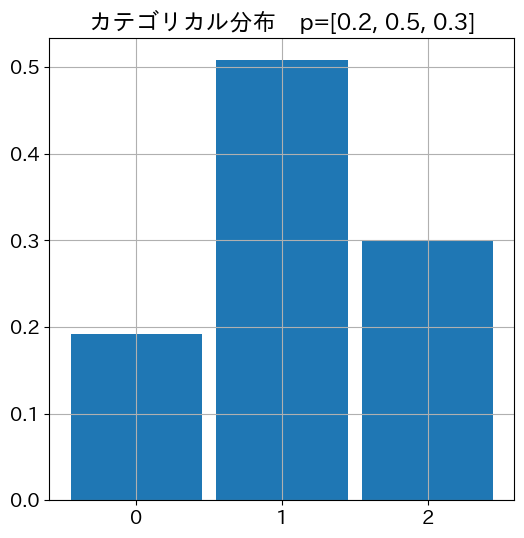

In [7]:
az.plot_dist(x_samples)
plt.title(f'カテゴリカル分布　p={p}');
#create_pdf()

### A.2 ディリクレ分布

#### 確率モデル定義

In [8]:
# パラメータ設定
n_components = 3

model = pm.Model()
with model:
    # ディリクレ分布
    # a:パラメータ　[1, 1, 1]だと一様分布
    p = pm.Dirichlet('p', a=np.ones(n_components))

#### 事前分布のサンプリングとサンプル値抽出

In [9]:
with model:
    # サンプル値取得
    samples = pm.sample_prior_predictive(random_seed=42)

# サンプル値抽出
x_samples = samples['prior']['p'].values
# 桁数が多いので先頭10個だけに限定
print(x_samples[:,:10])

[[[0.30 0.56 0.14]
  [0.07 0.88 0.05]
  [0.01 0.03 0.96]
  [0.02 0.01 0.97]
  [0.16 0.80 0.05]
  [0.43 0.54 0.03]
  [0.11 0.53 0.35]
  [0.21 0.48 0.31]
  [0.84 0.06 0.10]
  [0.54 0.42 0.05]]]


#### サンプリング結果の可視化

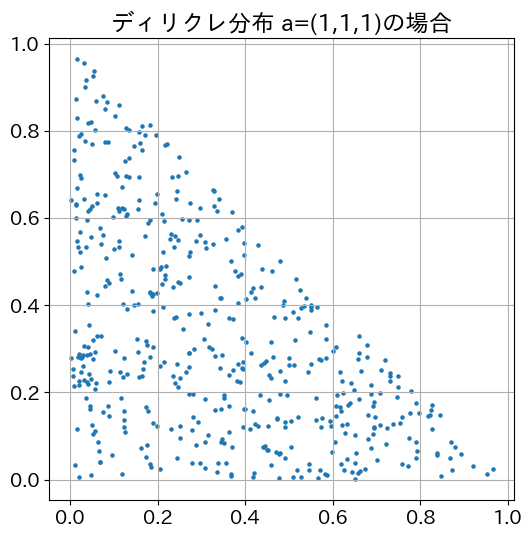

In [10]:
# サンプル値の可視化
samples = x_samples.reshape(-1,3)
plt.title('ディリクレ分布 a=(1,1,1)の場合')
x1 = samples[:,0]
x2 = samples[:,1]
plt.scatter(x1,x2, s=5);
#create_pdf()

### A.3 3クラス潜在変数モデル

#### データ読み込み

In [11]:
# アイリスデータセットの読み込み
df = sns.load_dataset('iris')

# 先頭5行の確認
display(df.head())

#  speciesの分布確認
df['species'].value_counts()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

#### 変数設定

In [12]:
#  観測値データ
X = df['petal_width'].values

#  データ件数
N = X.shape

# 分類先クラス数
n_components = 3

#### 確率モデル定義

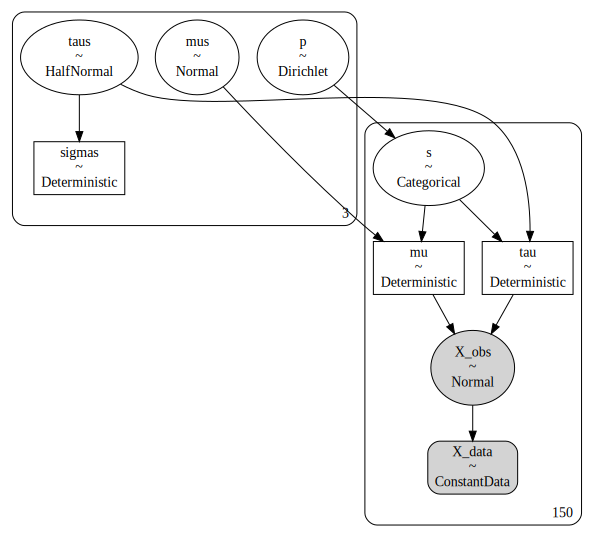

In [13]:
model = pm.Model()

with model:
    #  観測値をpm.ConstantDataで定義する
    X_data = pm.ConstantData('X_data', X)

    # p:  それぞれの値を取るの確率を示す3要素のベクトル
    p = pm.Dirichlet('p', a=np.ones(n_components))

    # s: pの確率値を基に0, 1, 2のいずれかの値を返す
    s = pm.Categorical('s', p=p, shape=N)

    # mus: 3つの花の種類毎の平均値
    mus = pm.Normal('mus', mu=0.0, sigma=10.0, shape=n_components)

    # taus: 3つの花の種類毎のバラツキ
    # 標準偏差sigmasとは　taus = 1/(sigmas*sigmas) の関係にある
    taus = pm.HalfNormal('taus', sigma=10.0, shape=n_components)

    # グラフ描画など分析でsigmaが必要なため、tauからsigmaを求めておく
    sigmas = pm.Deterministic('sigmas', 1/pm.math.sqrt(taus))

    # 各観測値ごとに潜在変数からmuとtauを求める
    mu = pm.Deterministic('mu', mus[s])
    tau = pm.Deterministic('tau', taus[s])

    # 正規分布に従う確率変数X_obsの定義
    X_obs = pm.Normal('X_obs', mu=mu, tau=tau, observed=X_data)

# モデル構造可視化
g = pm.model_to_graphviz(model)
display(g);
#g.render(filename='model-A-03-01',format='pdf')

#### サンプリング

In [14]:
with model:
    idata = pm.sample(
      chains=1, draws=2000, target_accept=0.99,
      random_seed=42)

#### 推論結果の確認

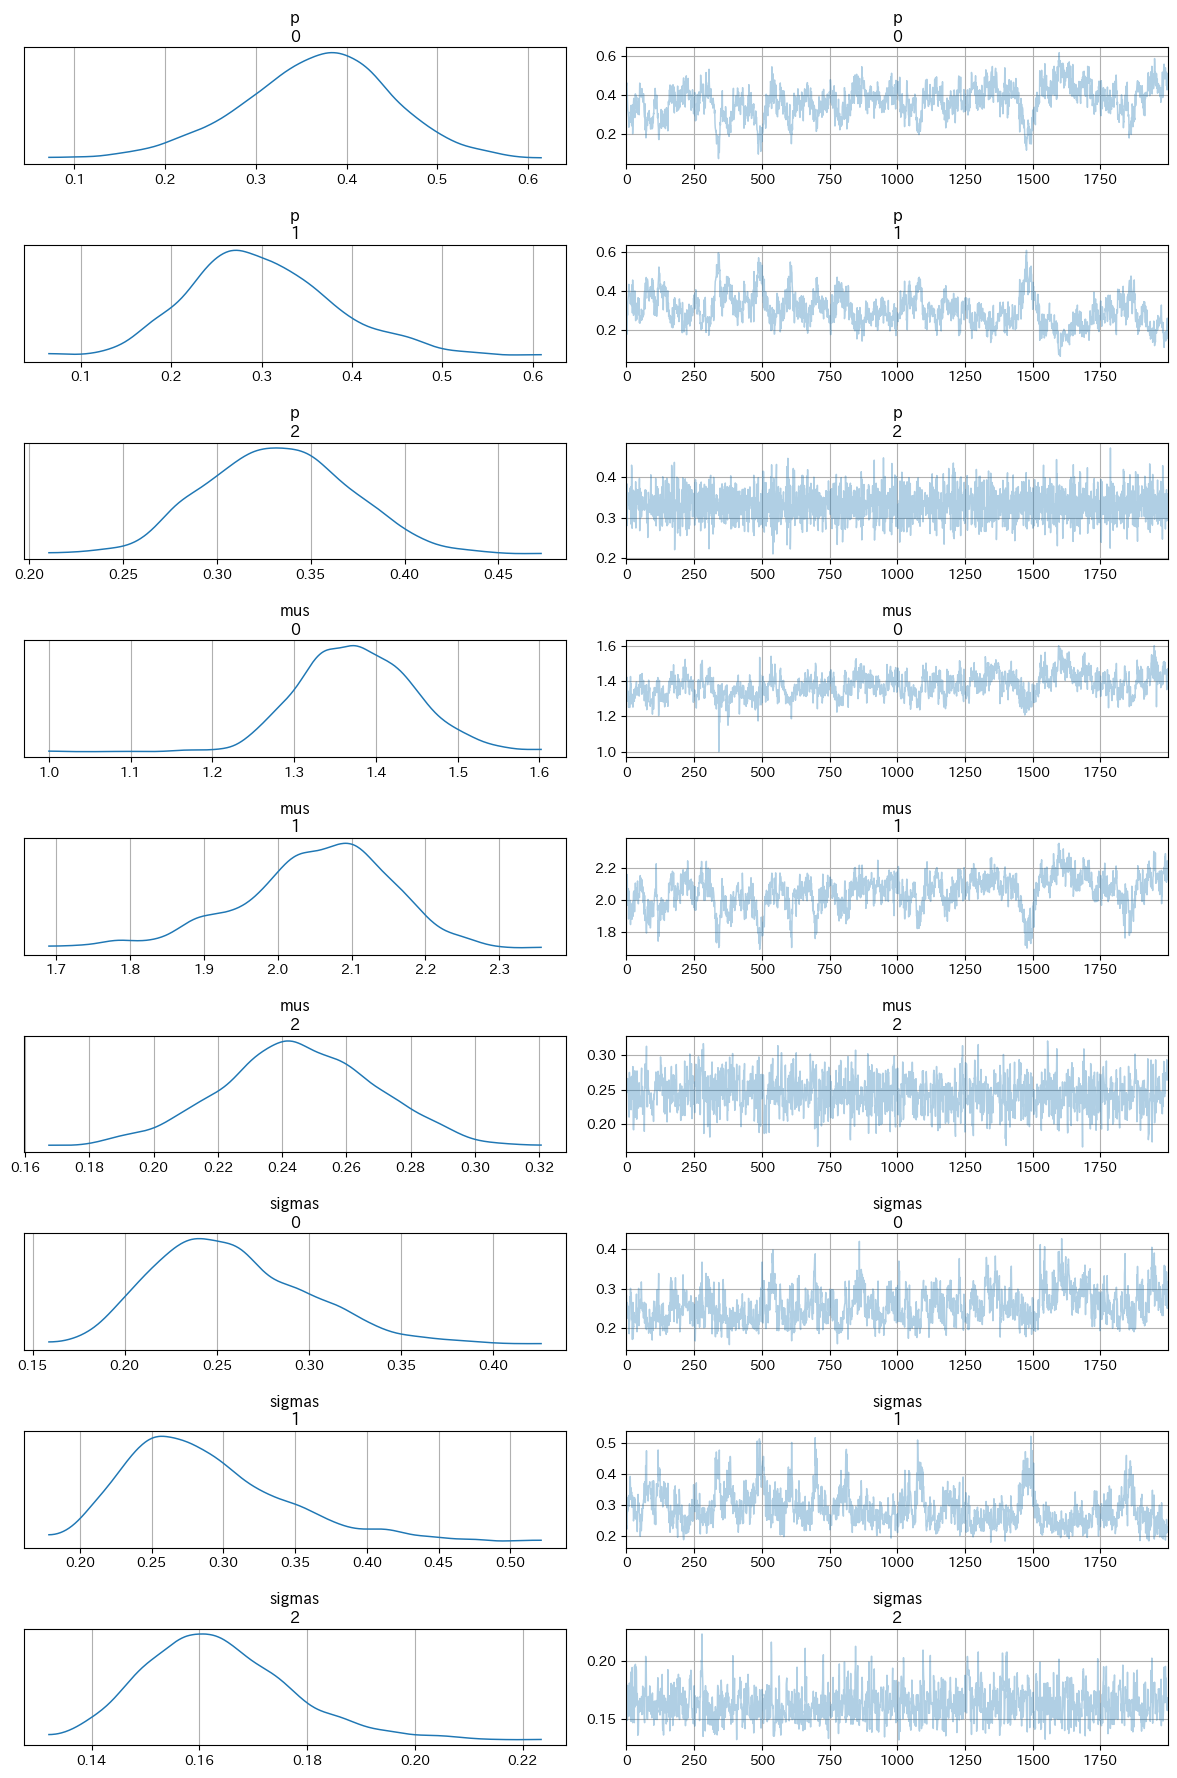

In [15]:
az.plot_trace(idata, var_names=['p', 'mus', 'sigmas'], compact=False)
plt.tight_layout();
#create_pdf()

#### 統計処理の集計

In [16]:
summary = az.summary(idata, var_names=['p', 'mus', 'sigmas'],
    hdi_prob=0.95, round_to=2)
display(summary)

Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p[0],0.37,0.08,0.20,0.52,0.02,0.01,26.34,71.34,NaN
p[1],0.30,0.08,0.16,0.47,0.02,0.01,26.73,61.00,NaN
p[2],0.33,0.04,0.27,0.41,0.00,0.00,3804.65,1551.41,NaN
mus[0],1.38,0.07,1.25,1.51,0.02,0.01,19.83,106.98,NaN
mus[1],2.05,0.11,1.84,2.26,0.02,0.01,24.02,68.17,NaN
mus[2],0.24,0.02,0.20,0.29,0.00,0.00,919.89,1111.67,NaN
sigmas[0],0.26,0.04,0.18,0.34,0.01,0.00,52.39,253.40,NaN
sigmas[1],0.29,0.06,0.20,0.41,0.01,0.01,47.35,218.82,NaN
sigmas[2],0.16,0.01,0.14,0.19,0.00,0.00,836.34,818.88,NaN


#### ヒストグラムと推論結果の重ね描き

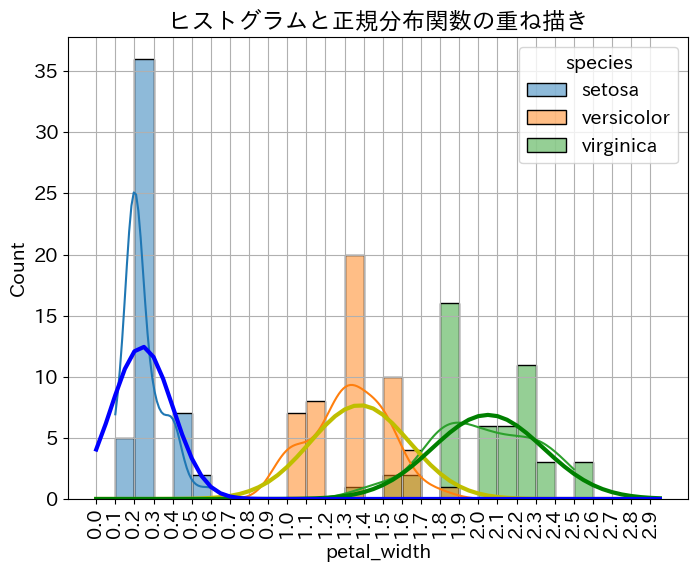

In [17]:
# 正規分布関数の定義
def norm(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2) / (np.sqrt(2 * np.pi) * sigma)

# 推論結果から各パラメータの平均値を取得
mean = summary['mean']

# muの平均値取得
mean_mu0 = mean['mus[0]']
mean_mu1 = mean['mus[1]']
mean_mu2 = mean['mus[2]']

# sigmaの平均値取得
mean_sigma0 = mean['sigmas[0]']
mean_sigma1 = mean['sigmas[1]']
mean_sigma2 = mean['sigmas[2]']

# グラフ描画
x = np.arange(0.0, 3.0, 0.05)
plt.rcParams['figure.figsize']=(8,6)
fig, ax = plt.subplots()
sns.histplot(
    data=df,
    bins=np.arange(0.0, 3.0, 0.1),
    x='petal_width',
    hue='species', kde=True)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('petal_widthのヒストグラム')
plt.xticks(np.arange(0.0, 3.0, 0.1));
plt.title('ヒストグラムと正規分布関数の重ね描き')
plt.plot(x, norm(x, mean_mu0, mean_sigma0)*5.0, c='y', lw=3)
plt.plot(x, norm(x, mean_mu1, mean_sigma1)*5.0, c='g', lw=3)
plt.plot(x, norm(x, mean_mu2, mean_sigma2)*5.0, c='b', lw=3);
#create_pdf()

### A.4 3クラス潜在変数モデル(失敗例)

#### 確率モデル定義

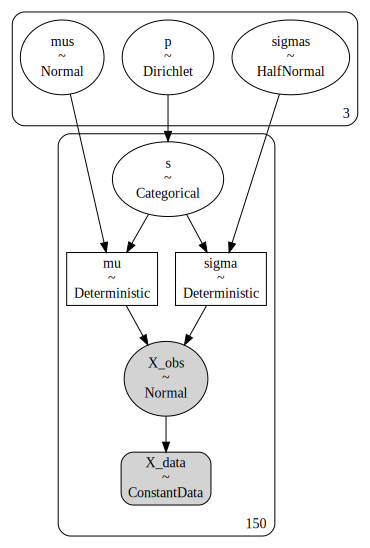

In [18]:
model2 = pm.Model()

with model2:
    #  観測値をpm.ConstantDataで定義する
    X_data = pm.ConstantData('X_data', X)

    # p:  それぞれの値を取るの確率を示す3要素のベクトル
    p = pm.Dirichlet('p', a=np.ones(n_components))

    # s: pの確率値を基に0, 1, 2のいずれかの値を返す
    s = pm.Categorical('s', p=p, shape=N)

    # mus: 3つの花の種類毎の平均値
    mus = pm.Normal('mus', mu=0.0, sigma=10.0, shape=n_components)

    # taus: 3つの花の種類毎のバラツキ
    # 標準偏差sigmasとは　taus = 1/(sigmas*sigmas) の関係にある
    sigmas = pm.HalfNormal('sigmas', sigma=10.0, shape=n_components)

    # 各観測値ごとに潜在変数からmuとtauを求める
    mu = pm.Deterministic('mu', mus[s])
    sigma = pm.Deterministic('sigma', sigmas[s])

    # mu[s], tau[s]: 潜在変数による参照
    X_obs = pm.Normal('X_obs', mu=mu, sigma=sigma, observed=X_data)

# モデル構造可視化
g = pm.model_to_graphviz(model2)
display(g);
#g.render(filename='model-A-03-02',format='pdf')

#### サンプリングと推論結果の確認

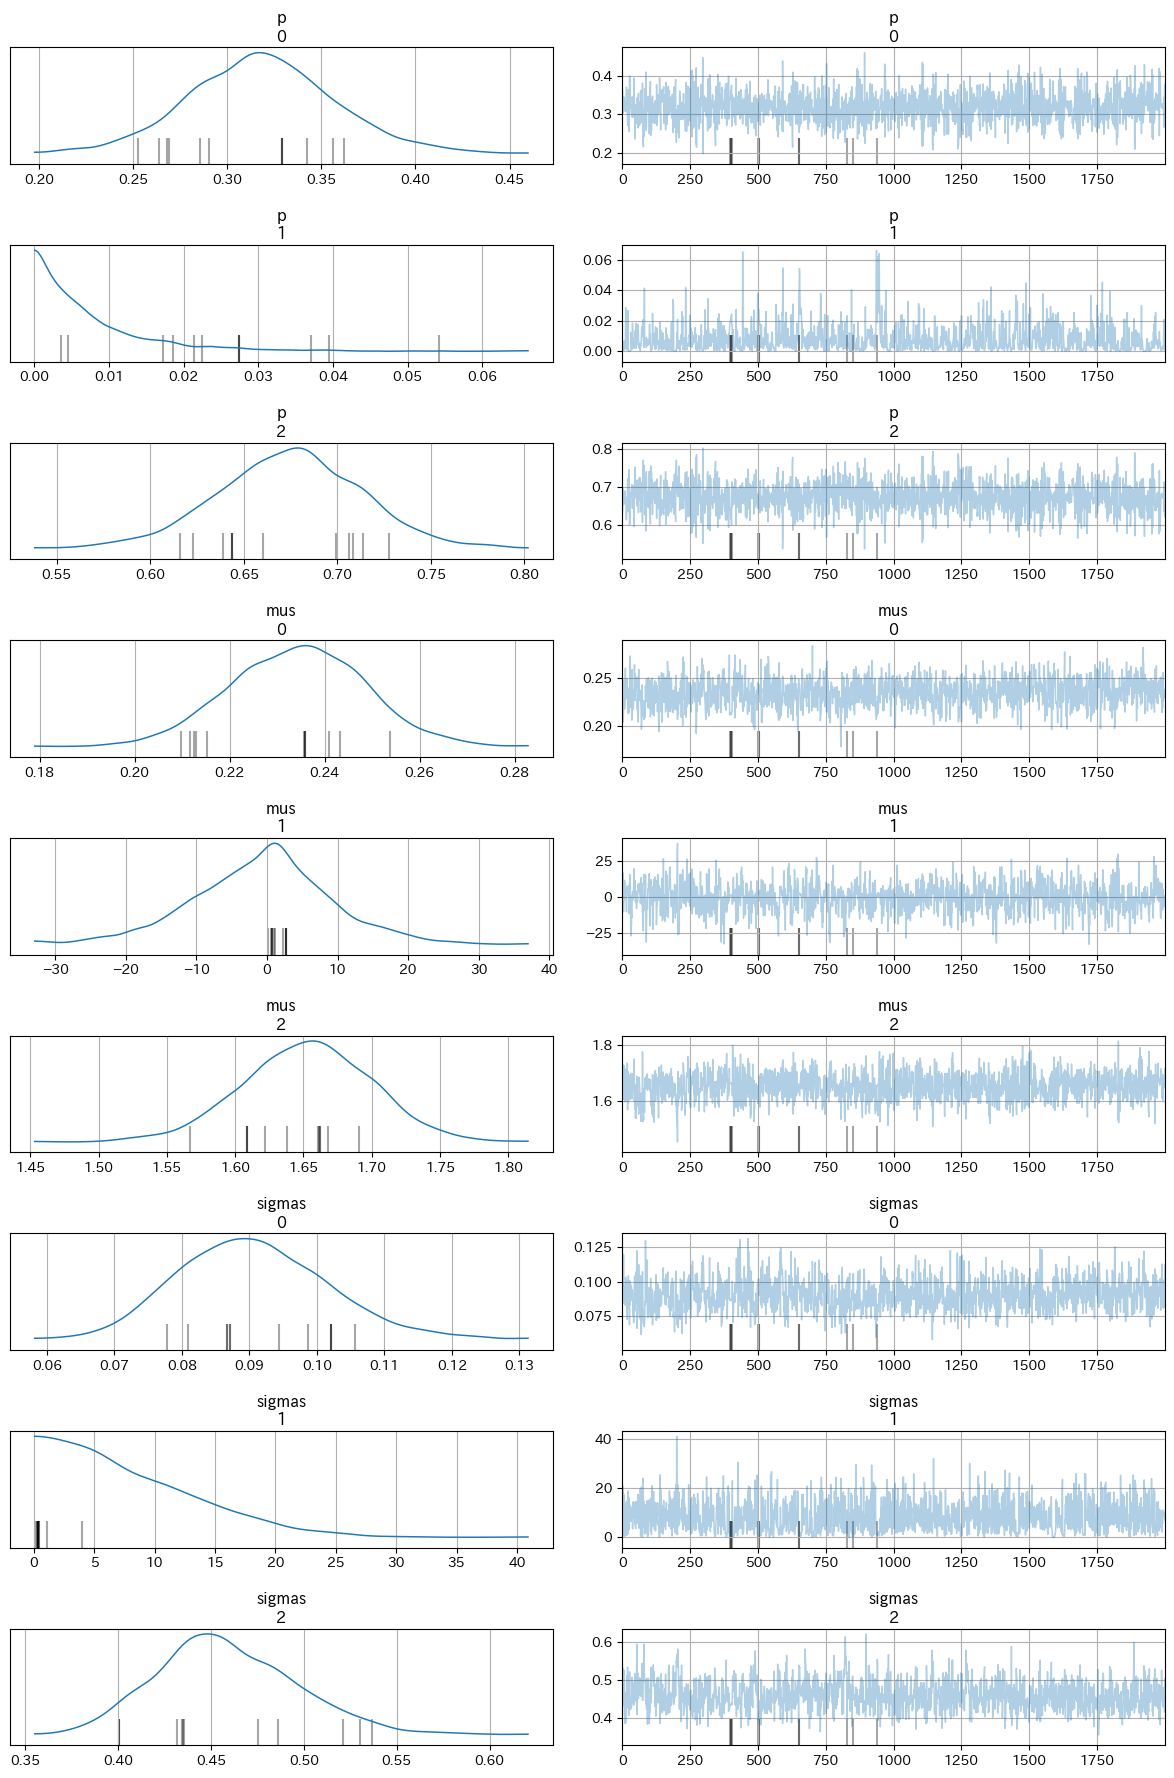

In [19]:
with model2:
    idata2 = pm.sample(
      chains=1, draws=2000, target_accept=0.99,
      random_seed=42)

az.plot_trace(idata2, var_names=['p', 'mus', 'sigmas'], compact=False)
plt.tight_layout();
#create_pdf()

### A.5 3クラス潜在モデル(改良版)

#### 確率モデル定義

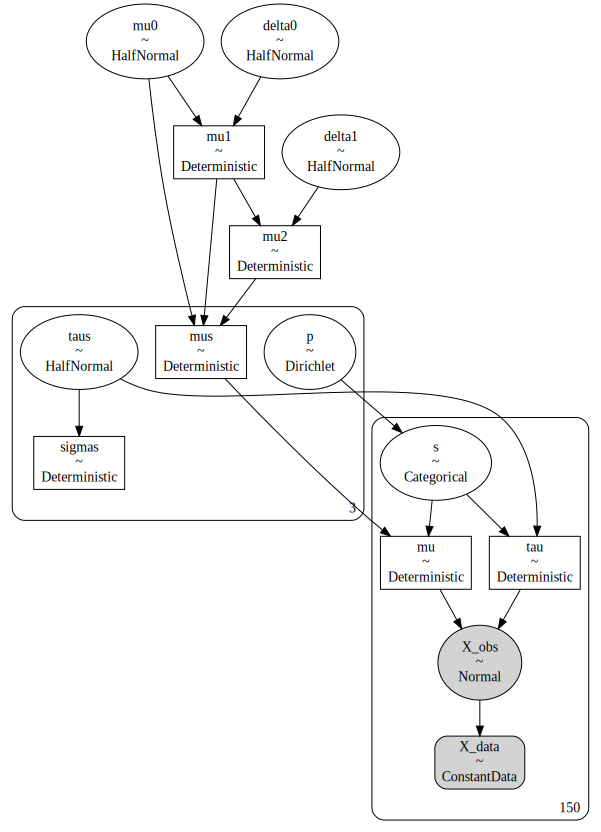

In [20]:
model3 = pm.Model()

with model3:
    #  観測値をpm.ConstantDataで定義する
    X_data = pm.ConstantData('X_data', X)

    # p:  それぞれの値を取るの確率を示す3要素のベクトル
    p = pm.Dirichlet('p', a=np.ones(n_components))

    # s: pの確率値を基に0, 1, 2のいずれかの値を返す
    s = pm.Categorical('s', p=p, shape=N)

    # mus: 3つの花の種類毎の平均値
    mu0 = pm.HalfNormal('mu0', sigma=10.0)
    delta0 = pm.HalfNormal('delta0', sigma=10.0)
    mu1 = pm.Deterministic('mu1', mu0+delta0)
    delta1 = pm.HalfNormal('delta1', sigma=10.0)
    mu2 = pm.Deterministic('mu2', mu1+delta1)
    mus = pm.Deterministic('mus', pm.math.stack([mu0, mu1, mu2]))

    # taus: 3つの花の種類毎のバラツキ
    # 標準偏差sigmasとは　taus = 1/(sigmas*sigmas) の関係にある
    taus = pm.HalfNormal('taus', sigma=10.0, shape=n_components)

    # グラフ描画など分析でsigmaが必要なため、tauからsigmaを求めておく
    sigmas = pm.Deterministic('sigmas', 1/pm.math.sqrt(taus))

    # 各観測値ごとに潜在変数からmuとtauを求める
    mu = pm.Deterministic('mu', mus[s])
    tau = pm.Deterministic('tau', taus[s])

    # mu[s], tau[s]: 潜在変数による参照
    X_obs = pm.Normal('X_obs', mu=mu, tau=tau, observed=X_data)

# モデル構造可視化
g = pm.model_to_graphviz(model3)
display(g);
#g.render(filename='model-A-03-03',format='pdf')

#### サンプリングと推計結果の確認

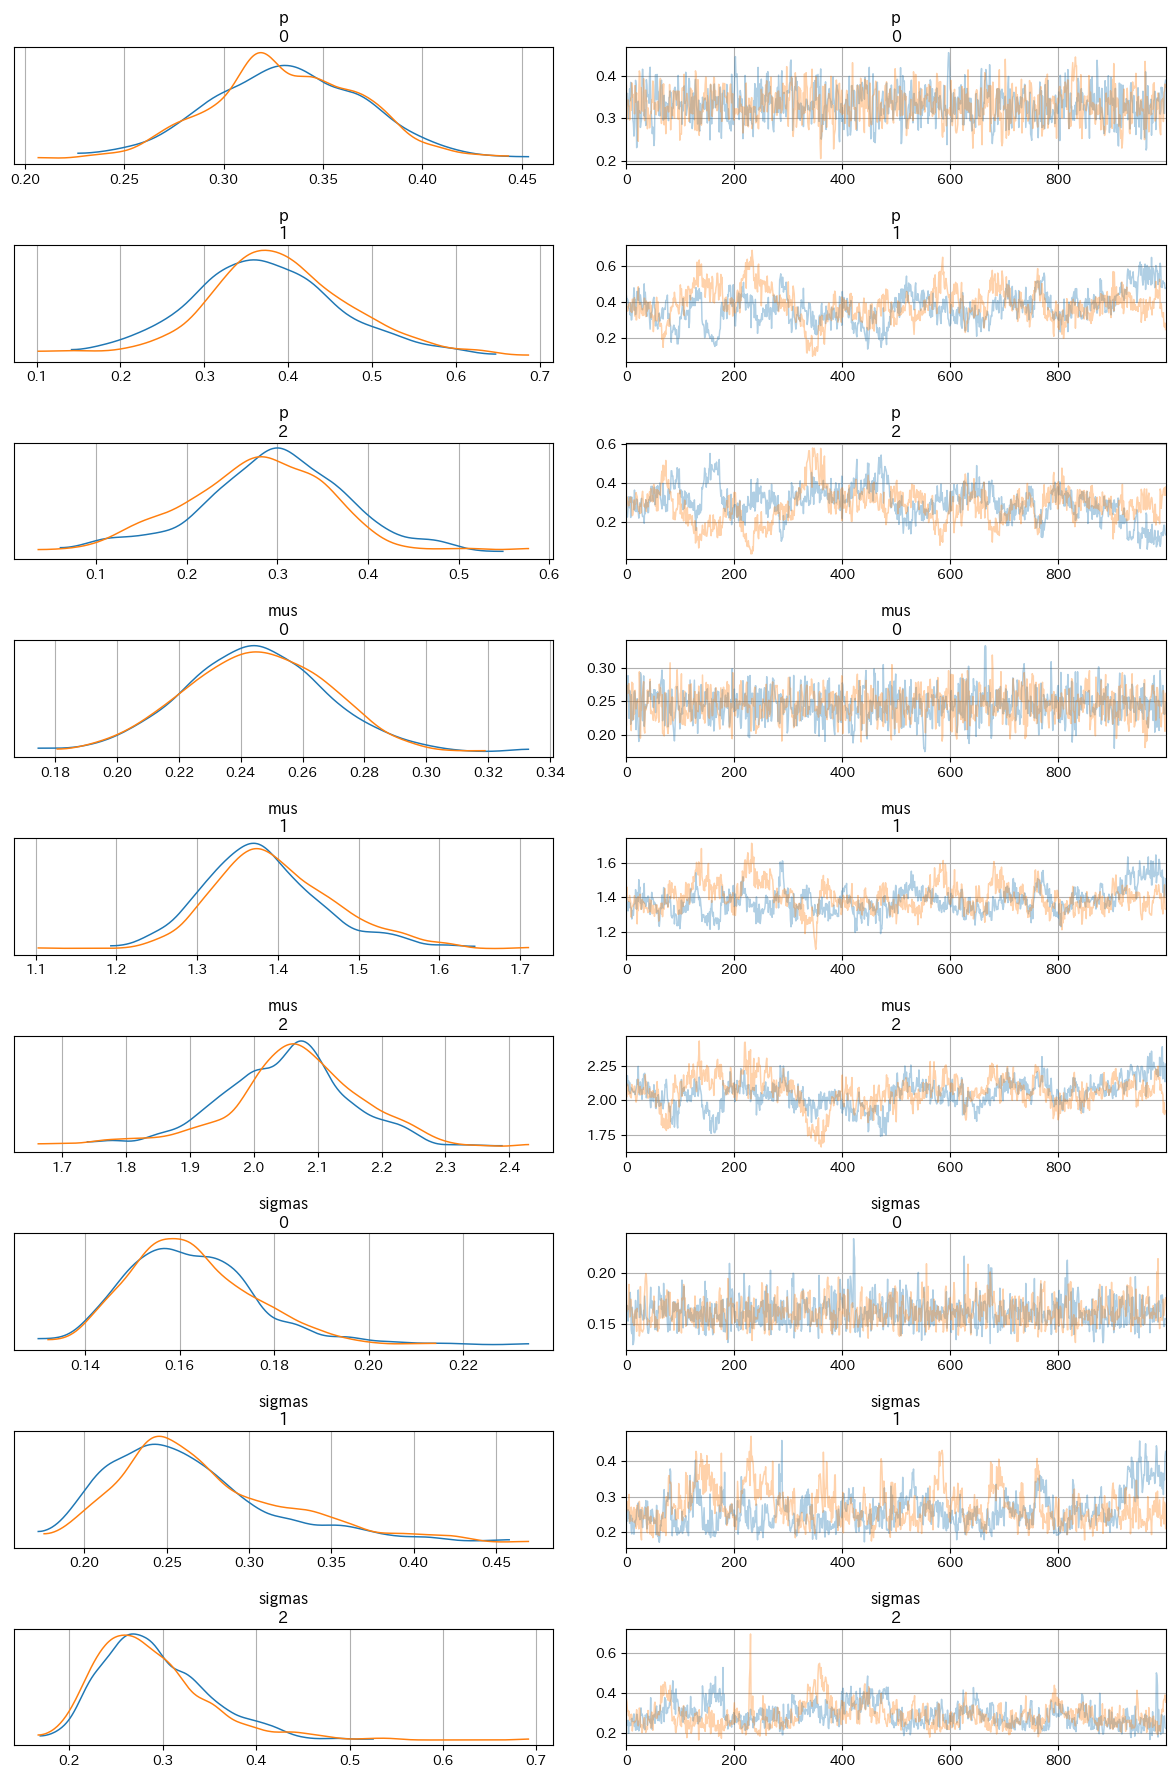

In [25]:
with model3:
    idata3 = pm.sample(
      target_accept=0.99, random_seed=42)

plt.rcParams['figure.figsize']=(6,6)
az.plot_trace(idata3, var_names=['p', 'mus', 'sigmas'], compact=False)
plt.tight_layout();
#create_pdf()

#### 統計処理の集計

In [23]:
summary3 = az.summary(idata3, var_names=['p', 'mus', 'sigmas'],
    hdi_prob=0.95, round_to=2)
display(summary3)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p[0],0.33,0.04,0.26,0.41,0.00,0.00,934.84,981.95,1.00
p[1],0.38,0.09,0.21,0.57,0.02,0.01,36.48,110.54,1.06
p[2],0.29,0.09,0.10,0.45,0.01,0.01,35.99,85.18,1.06
mus[0],0.24,0.02,0.20,0.29,0.00,0.00,1010.69,1004.74,1.00
mus[1],1.39,0.08,1.25,1.55,0.01,0.01,48.71,140.34,1.05
mus[2],2.06,0.11,1.84,2.27,0.02,0.01,34.34,99.52,1.06
sigmas[0],0.16,0.01,0.14,0.19,0.00,0.00,1175.96,1014.48,1.00
sigmas[1],0.27,0.05,0.18,0.37,0.01,0.01,55.16,139.98,1.04
sigmas[2],0.29,0.06,0.19,0.41,0.01,0.01,47.38,150.23,1.05


#### ヒストグラムと推論結果の重ね描き

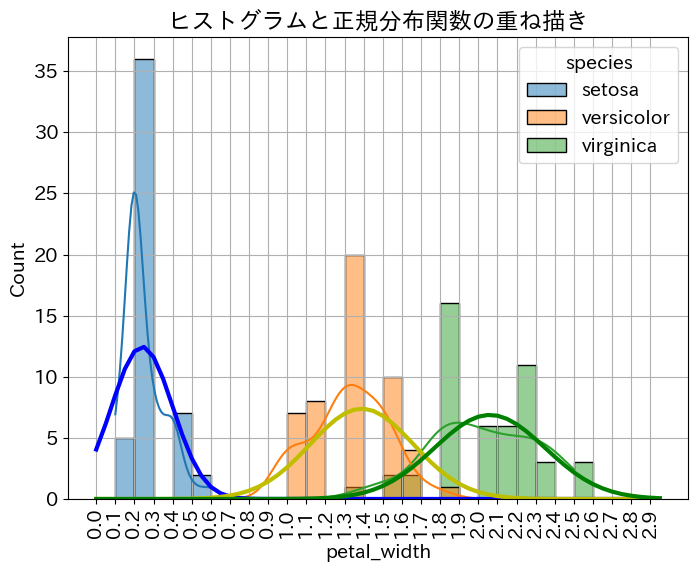

In [24]:
# 推論結果から各パラメータの平均値を取得
mean3 = summary3['mean']

# muの平均値取得
mean_mu0 = mean3['mus[0]']
mean_mu1 = mean3['mus[1]']
mean_mu2 = mean3['mus[2]']

# sigmaの平均値取得
mean_sigma0 = mean3['sigmas[0]']
mean_sigma1 = mean3['sigmas[1]']
mean_sigma2 = mean3['sigmas[2]']

# グラフ描画
x = np.arange(0.0, 3.0, 0.05)
plt.rcParams['figure.figsize']=(8,6)
fig, ax = plt.subplots()
sns.histplot(
    data=df,
    bins=np.arange(0.0, 3.0, 0.1),
    x='petal_width',
    hue='species', kde=True)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('petal_widthのヒストグラム')
plt.xticks(np.arange(0.0, 3.0, 0.1));
plt.title('ヒストグラムと正規分布関数の重ね描き')
plt.plot(x, norm(x, mean_mu0, mean_sigma0)*5.0, c='b', lw=3)
plt.plot(x, norm(x, mean_mu1, mean_sigma1)*5.0, c='y', lw=3)
plt.plot(x, norm(x, mean_mu2, mean_sigma2)*5.0, c='g', lw=3);
#create_pdf()